In [2]:
import pandas as pd
import numpy as snp
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10,10)
sns.set_style('whitegrid')

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/pandas/master/dataset/student-mat.csv")

In [4]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [6]:
df.shape

(395, 33)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [8]:
df['internet'].unique()

array(['no', 'yes'], dtype=object)

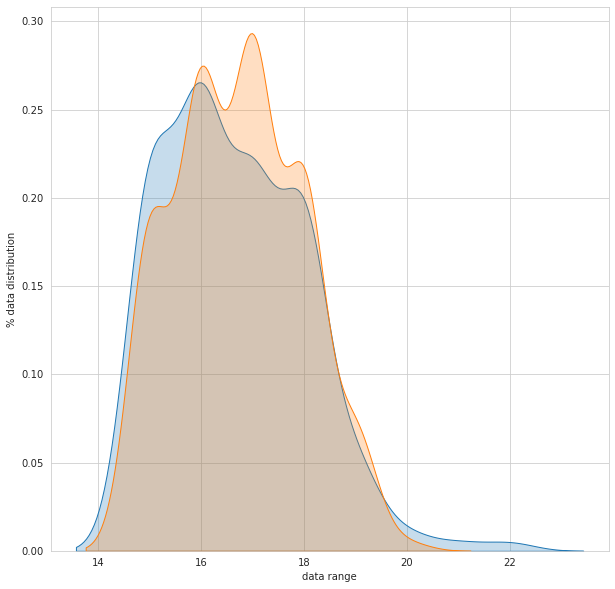

In [9]:
sns.kdeplot(df.groupby('sex').get_group('M')['age'], shade = True,label = 'male')
sns.kdeplot(df.groupby('sex').get_group('F')['age'], shade = True, label = 'female')
plt.xlabel('data range')
plt.ylabel('% data distribution')
plt.show()

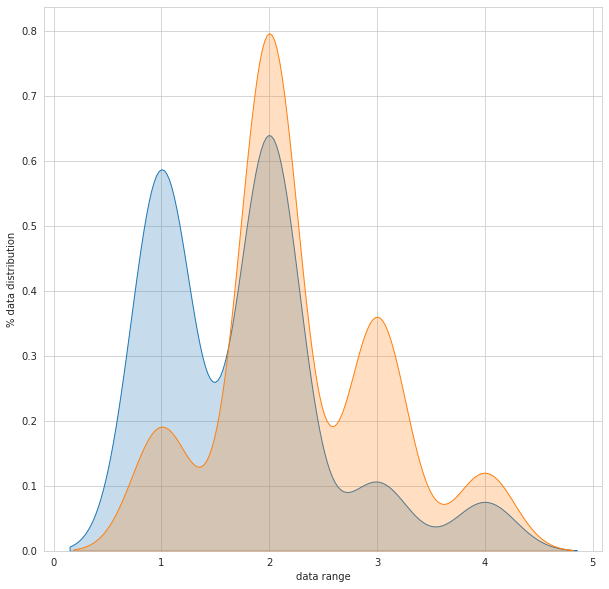

In [10]:
sns.kdeplot(df.groupby('sex').get_group('M')['studytime'], shade = True,label = 'male')
sns.kdeplot(df.groupby('sex').get_group('F')['studytime'], shade = True, label = 'female')
plt.xlabel('data range')
plt.ylabel('% data distribution')
plt.show()

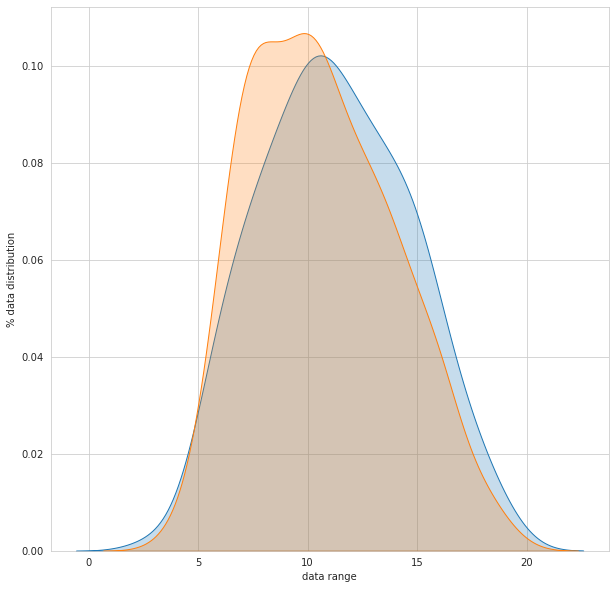

In [11]:
sns.kdeplot(df.groupby('sex').get_group('M')['G1'], shade = True,label = 'male')
sns.kdeplot(df.groupby('sex').get_group('F')['G1'], shade = True, label = 'female')
plt.xlabel('data range')
plt.ylabel('% data distribution')
plt.show()

In [13]:
s = df.dtypes=='object'
object_col = s[s].index
print(object_col)

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn

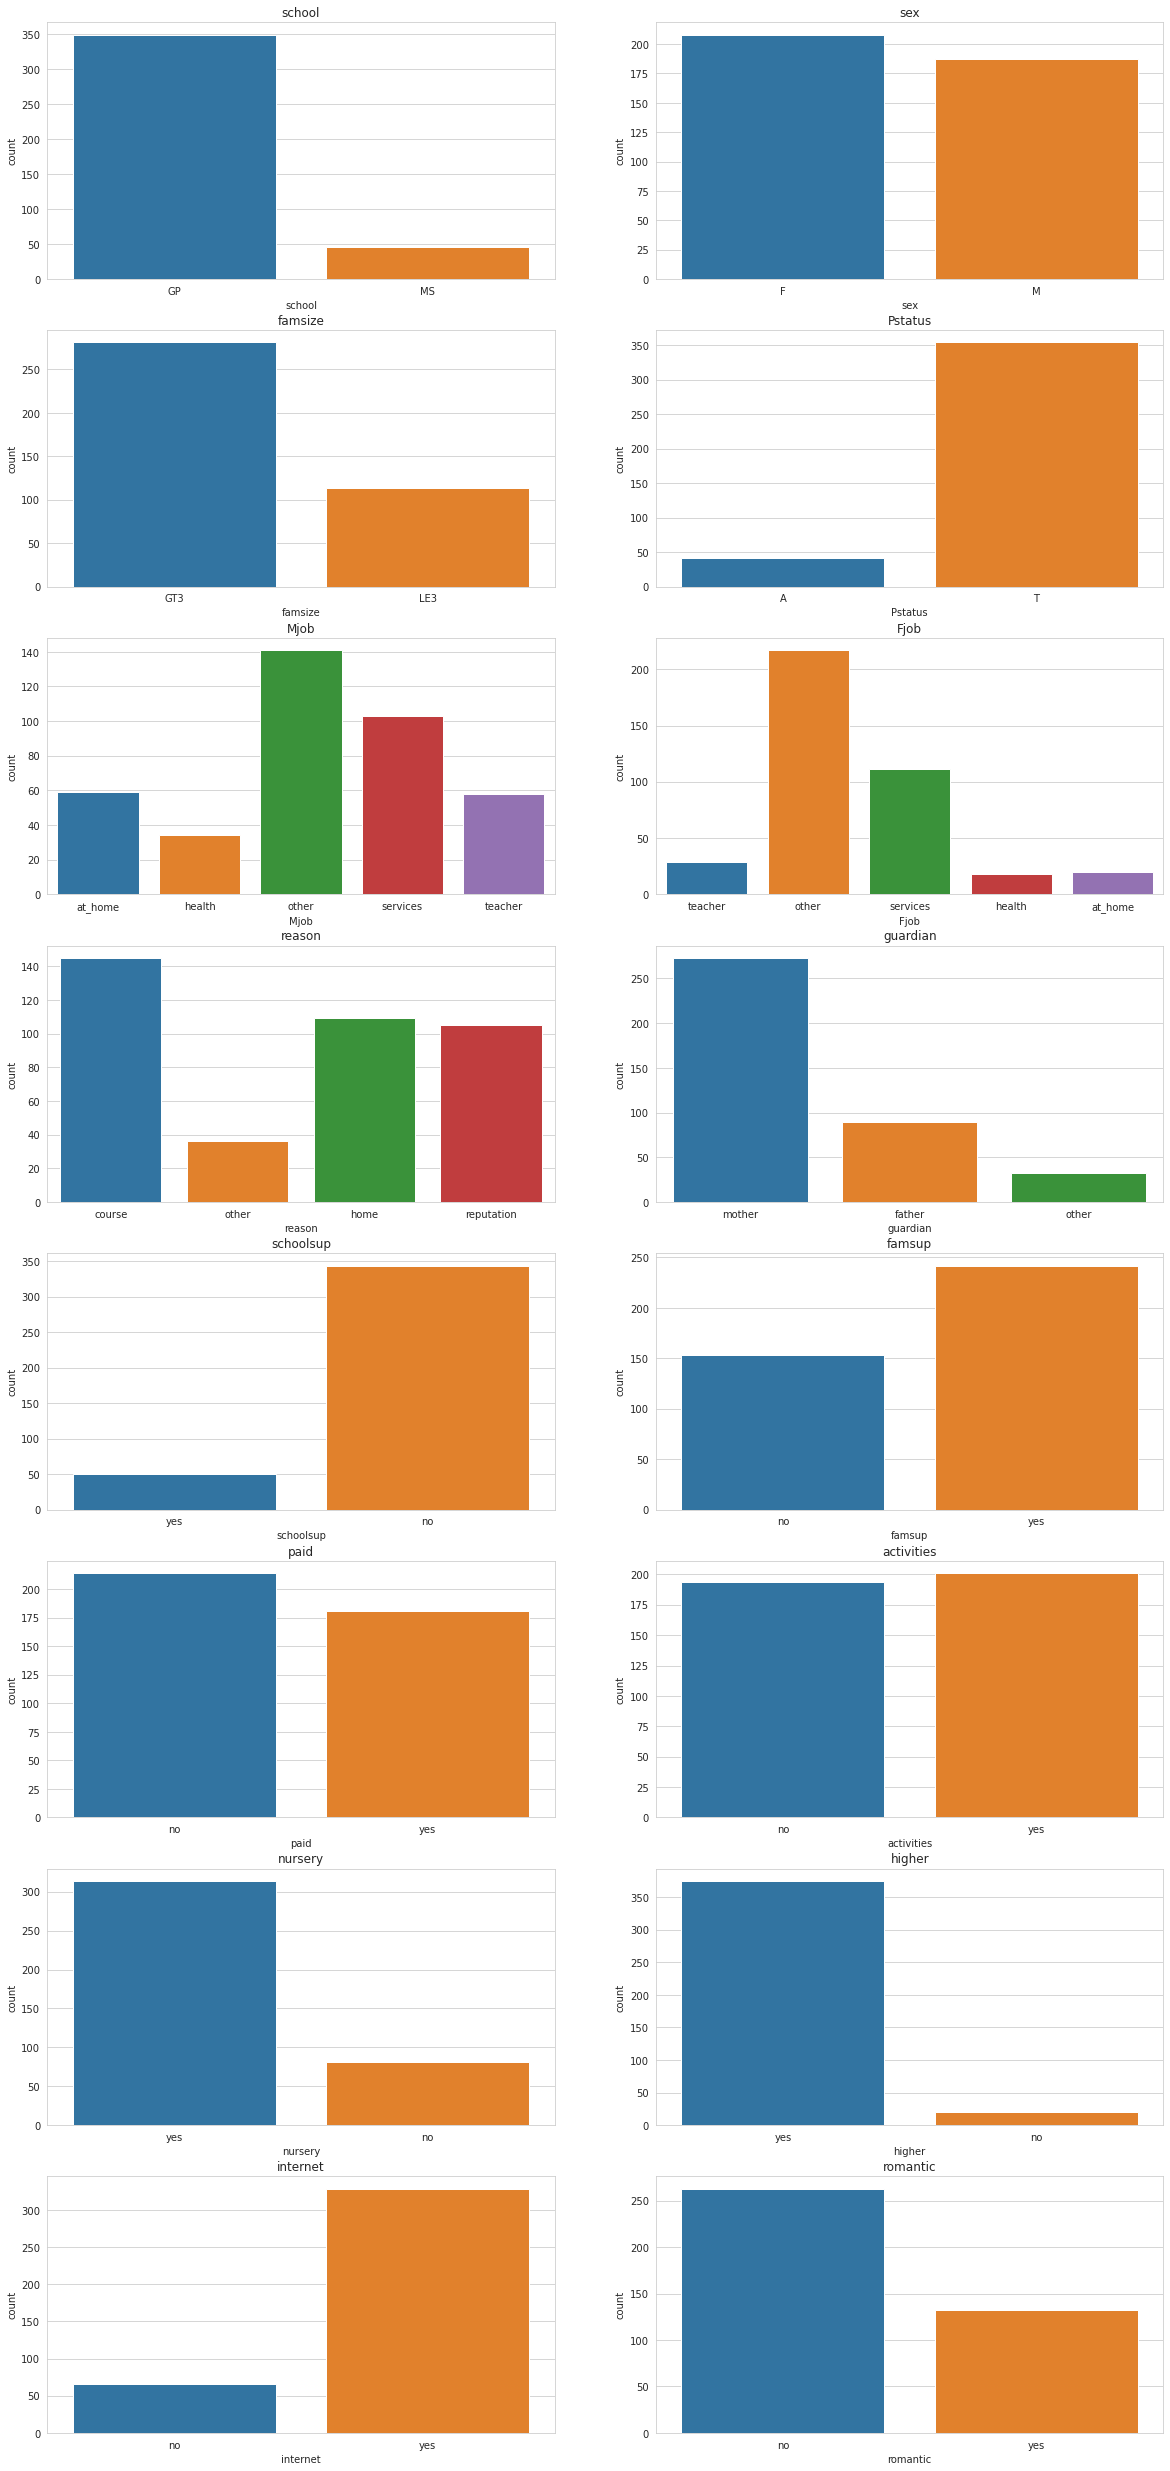

In [14]:
plt.figure(figsize = (20,50))
for i,item in enumerate(['school', 'sex', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic']):
    plt.subplot(9,2,i+1)
    sns.countplot(df[item])
    plt.title(item)

plt.show()   

In [15]:
df.groupby('Fjob')['G1'].median()

Fjob
at_home     11.5
health      11.0
other       10.0
services    11.0
teacher     14.0
Name: G1, dtype: float64

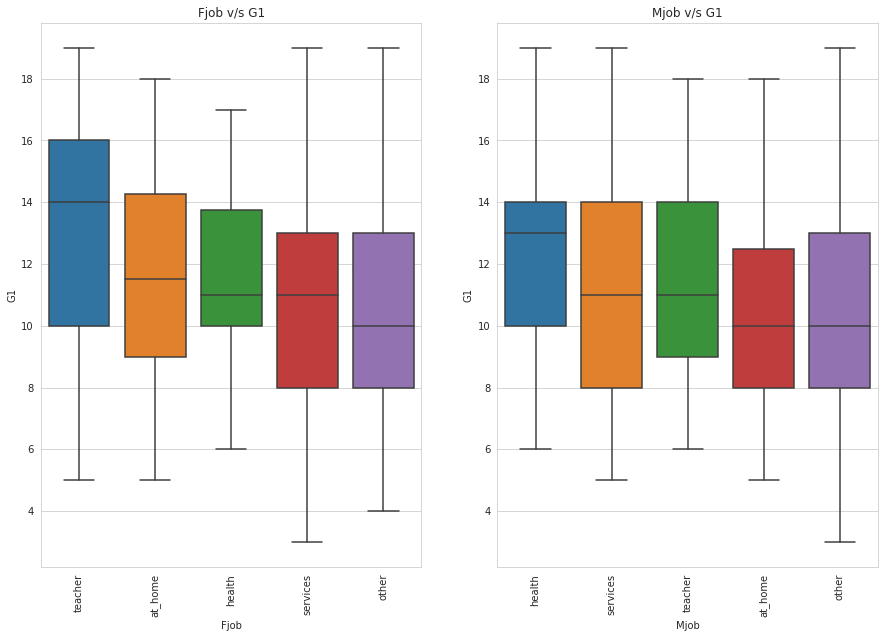

In [16]:
plt.figure(figsize= (15,10))
plt.subplot(1,2,1)
order_by = df.groupby('Fjob')['G1'].median().sort_values(ascending = False).index
sns.boxplot(x = df['Fjob'], y = df['G1'],order = order_by)
plt.xticks(rotation = 90)
plt.title('Fjob v/s G1')

plt.subplot(1,2,2)
order_by = df.groupby('Mjob')['G1'].median().sort_values(ascending = False).index
sns.boxplot(x = df['Mjob'], y = df['G1'],order = order_by)
plt.xticks(rotation = 90)
plt.title('Mjob v/s G1')

plt.show()

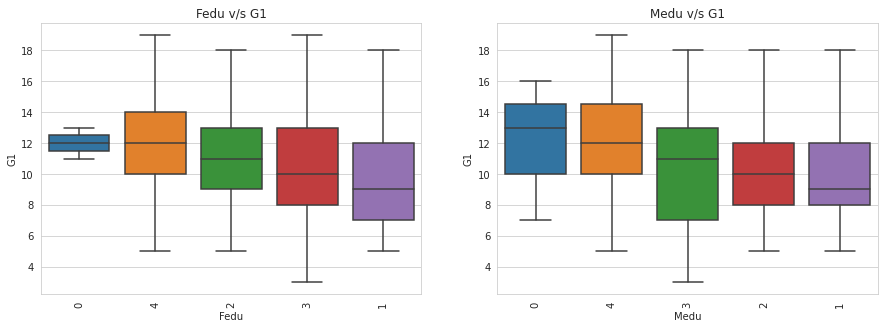

In [17]:
plt.figure(figsize= (15,5))
plt.subplot(1,2,1)
order_by = df.groupby('Fedu')['G1'].median().sort_values(ascending = False).index
sns.boxplot(x = df['Fedu'], y = df['G1'],order = order_by)
plt.xticks(rotation = 90)
plt.title('Fedu v/s G1')

plt.subplot(1,2,2)
order_by = df.groupby('Medu')['G1'].median().sort_values(ascending = False).index
sns.boxplot(x = df['Medu'], y = df['G1'],order = order_by)
plt.xticks(rotation = 90)
plt.title('Medu v/s G1')

plt.show()

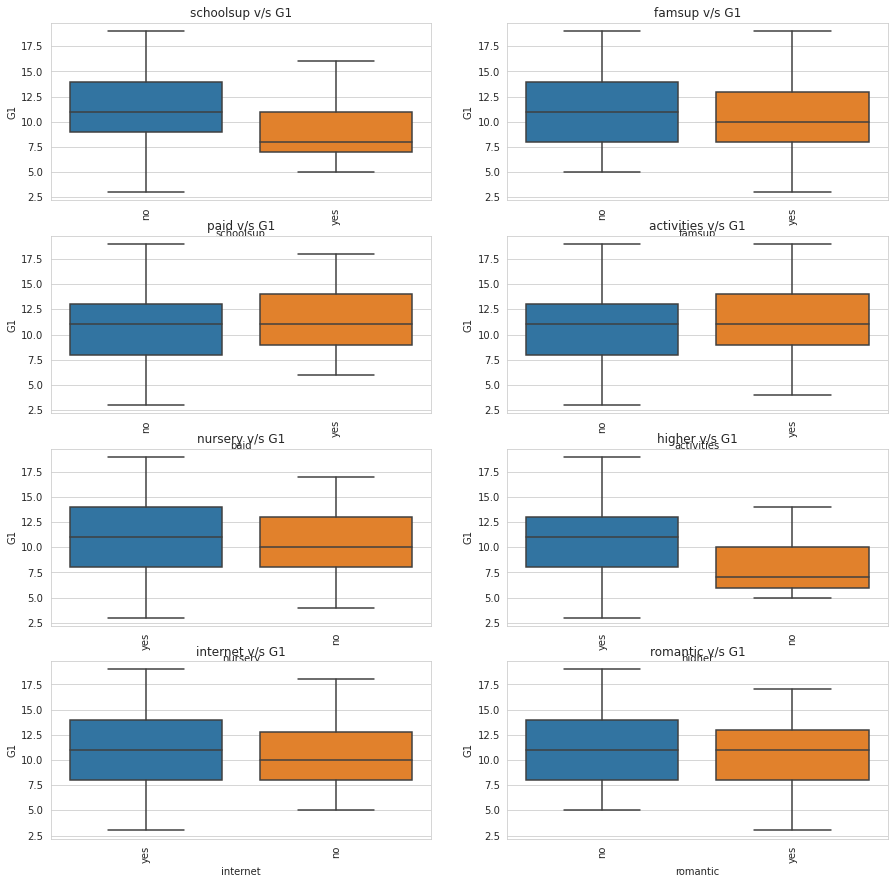

In [18]:
plt.figure(figsize = (15,15))
for i, item in enumerate(['schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic']):
    plt.subplot(4,2,i+1)
    order_by = df.groupby(item)['G1'].median().sort_values(ascending = False).index
    sns.boxplot(x = df[item], y = df['G1'],order = order_by)
    plt.xticks(rotation = 90)
    plt.title(item+' v/s G1')